<center><h1>Procrastination Example</h1></center>  


procrastination measure how much of students' effort distribution is "skewed" to the deadline

In [1]:
from clickfeatures import procrastination, timestamps
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

### 1. construct different effort distributions

In [2]:
def get_beta_distribution(a, b, n=100):
    r"""get the x, and f(x) of a beta distribution
    Argument:
        a (numeric): alpha in beta distribution
        b (numeric): beta in beta distribution
        n (int): number of x
    Return
        x, f(x) # f is the probability density function
    """
    x = np.linspace(0, 1, n)
    y =  np.array([stats.beta.pdf(_x, a, b) for _x in x])
    return x, y

In [3]:
# check if the function looks good
def draw_beta_distribution(a, b, n=100, color='blue'):
    x, y = get_beta_distribution(a, b, n)
    plt.plot(x, y, color=color)

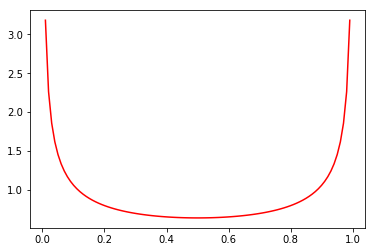

In [4]:
draw_beta_distribution(.5, .5, color='red')

You can find the shape of different beta distribution on [wikipage](https://en.wikipedia.org/wiki/Beta_distribution).

This looks the same to the $\alpha = .5, \beta=.5$ beta distribution.

In [5]:
def get_effort_distribution(a, b, n=100):
    r"""get effort distribution based on a beta distribution
    
    Argument:
        a (numeric): alpha in beta distribution
        b (numeric): beta in beta distribution
        n (int): number of x
    Return:
        timestamps (normalized) (0-1), 
    """
    
    x, y = get_beta_distribution(a, b, n)
    weights = y / y.sum()
    return x, weights

In [6]:
# less alpha means less procrastination
# equal alpha means neutral procrastination
# higher alpha means higher procrastination
ab = [(2, 5), (2, 2), (5, 2)]
ts = []
ws = []

for a, b in ab:
    _t, _w = get_effort_distribution(a, b)
    ts.append(_t)
    ws.append(_w)

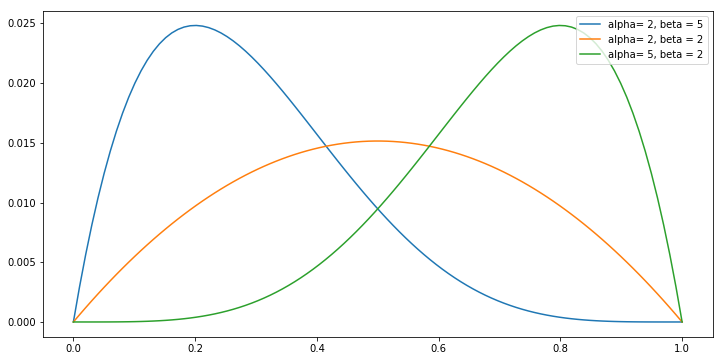

In [7]:
# visualize them
plt.figure(figsize=(12, 6))
for i, (a, b) in enumerate(ab):
    plt.plot(ts[i], ws[i], label='alpha= {}, beta = {}'.format(a, b))
plt.legend(loc=1)

### 2. calculate procrastination index

In [8]:
# first, craete a timestamp object
tstamps = [timestamps.TimeStamps(list(_t), list(_w)) for _t, _w in zip(ts, ws)]

In [9]:
# need to define a weight function on how much you penalize procrastination behavior
# for the tutorial purpose, just use a linear function
weight_func = lambda x: x

In [10]:
procs = [procrastination.weighted_mean(weight_func, tstamp) for tstamp in tstamps]

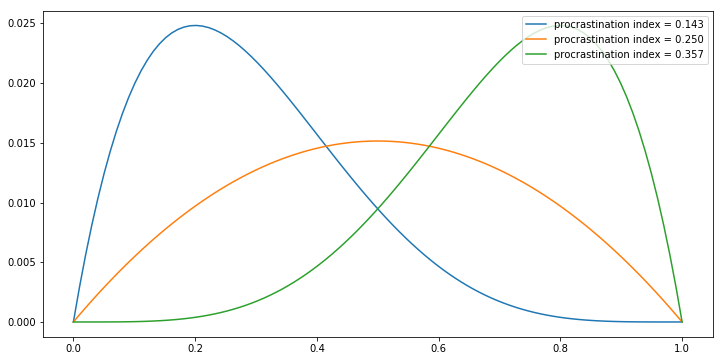

In [11]:
# visualize
plt.figure(figsize=(12, 6))
for i, proc in enumerate(procs):
    plt.plot(ts[i], ws[i], label='procrastination index = {:.3f}'.format(proc))
plt.legend(loc=1)

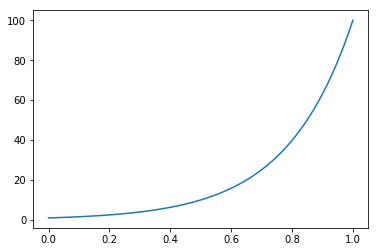

In [21]:
# try a different weight function that give procrastination a stronger penalty
weight_func = lambda x: 100 ** x
x = np.linspace(0, 1, 100)

plt.plot(x, weight_func(x))

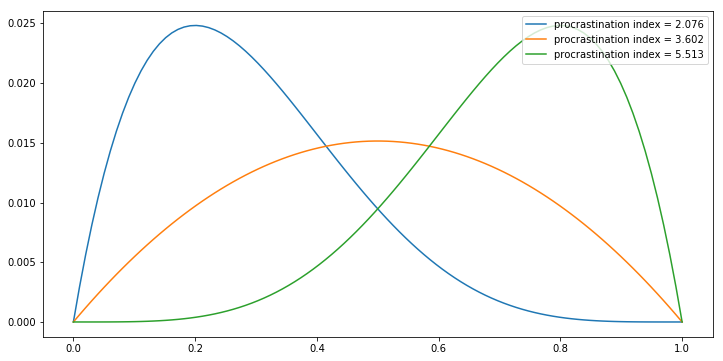

In [22]:
procs = [procrastination.weighted_mean(weight_func, tstamp) for tstamp in tstamps]
plt.figure(figsize=(12, 6))
for i, proc in enumerate(procs):
    plt.plot(ts[i], ws[i], label='procrastination index = {:.3f}'.format(proc))
plt.legend(loc=1)